In [1]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB # If options are more than yes and no
# If binary BernoilliNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [2]:
df=pd.read_csv("spam.csv",encoding="iso-8859-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.columns=["Class","Text"]

In [7]:
df

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df["Label"]=df["Class"].map({"ham":0,"spam":1})

In [9]:
df

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [10]:
df.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [11]:
import seaborn as sns

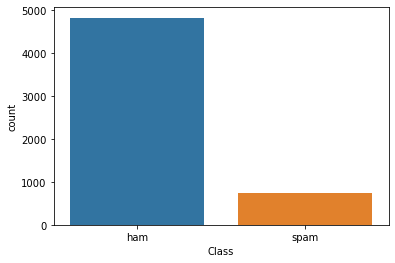

In [12]:
sns.countplot(data=df,x="Class");

In [13]:
df['Text']=df['Text'].str.lower()
df['Text']=df['Text'].str.replace('[^\w\s]','')
df['Text']=df['Text'].str.replace('\d+','')
df['Text']=df['Text'].str.replace('\n',' ').replace('\r','')

In [14]:
df

,Class,Text,Label
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in a wkly comp to win fa cup final...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i dont think he goes to usf he lives aroun...,0
...,...,...,...
5567,spam,this is the nd time we have tried contact u u...,1
5568,ham,will ì_ b going to esplanade fr home,0
5569,ham,pity was in mood for that soany other suggest...,0
5570,ham,the guy did some bitching but i acted like id ...,0


# Word Cloud

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from wordcloud import WordCloud

In [17]:
def woc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,max_words=100).generate(" ".join(data))
    # We will merge the data as it is row by row
    plt.imshow(wc)
    plt.axis("off") # Erases the edge of pictures
    

In [18]:
ham=df.query("Class=='ham'")['Text']

In [19]:
spam=df.query("Class=='spam'")['Text']

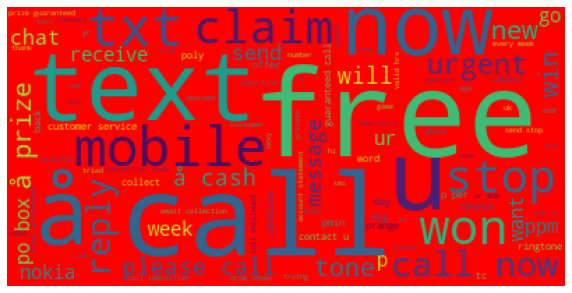

In [20]:
woc(spam,"red")

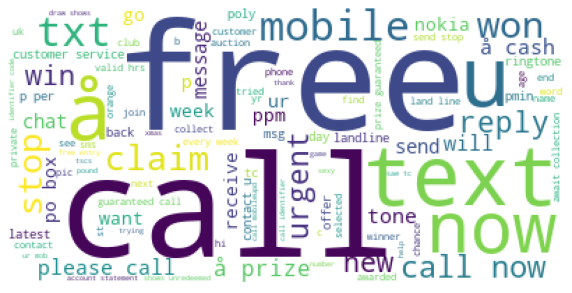

In [21]:
woc(spam,"white")

In [22]:
import nltk

In [23]:
ham.str.split()

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, dont, think, he, goes, to, usf, he, l...
6       [even, my, brother, is, not, like, to, speak, ...
                              ...                        
5565                                        [huh, y, lei]
5568        [will, ì_, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, soany, other,...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: Text, Length: 4825, dtype: object

In [24]:
ham_freq = nltk.FreqDist(ham.str.split()[0]) # Indicates how many times 1 word is

In [25]:
liste=["Mehmet","Mehmet","David","Jonathan","David"]

In [26]:
nltk.FreqDist(liste) 

FreqDist({'Mehmet': 2, 'David': 2, 'Jonathan': 1})

In [27]:
ham_freq

FreqDist({'go': 1, 'until': 1, 'jurong': 1, 'point': 1, 'crazy': 1, 'available': 1, 'only': 1, 'in': 1, 'bugis': 1, 'n': 1, ...})

In [28]:
df["Text"]

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in  a wkly comp to win fa cup final...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the nd time we have tried  contact u u...
5568                 will ì_ b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: Text, Length: 5572, dtype: object

In [29]:
df["Label"]

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Label, Length: 5572, dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df["Text"], df["Label"], random_state = 42)

# Tokenization

In [31]:
vect=CountVectorizer(lowercase=True,stop_words="english") 
x_train_dtm=vect.fit_transform(x_train) # It turn to the number
print(x_train_dtm)
x_test_dtm=vect.transform(x_test)

  (1, 5951)	1
  (1, 2564)	1
  (1, 3092)	1
  (1, 6560)	1
  (1, 6401)	1
  (1, 2725)	1
  (1, 5343)	1
  (1, 6093)	1
  (2, 6253)	1
  (2, 6631)	1
  (2, 5936)	1
  (2, 1127)	1
  (2, 6387)	2
  (2, 2574)	1
  (2, 1968)	1
  (2, 1943)	1
  (2, 4898)	1
  (2, 5745)	1
  (2, 2208)	1
  (2, 5266)	1
  (2, 737)	1
  (3, 4770)	1
  (3, 2003)	1
  (3, 4471)	2
  (3, 1214)	1
  :	:
  (4172, 5008)	1
  (4172, 5427)	1
  (4173, 5627)	1
  (4174, 2367)	1
  (4174, 1053)	1
  (4174, 5411)	1
  (4174, 839)	1
  (4174, 4479)	1
  (4174, 2718)	1
  (4174, 2741)	1
  (4175, 2832)	1
  (4175, 3245)	1
  (4175, 5520)	1
  (4176, 2574)	1
  (4176, 2835)	1
  (4176, 4571)	1
  (4176, 5530)	1
  (4176, 5529)	1
  (4177, 6142)	1
  (4177, 5229)	1
  (4177, 4070)	1
  (4177, 3061)	1
  (4178, 2367)	1
  (4178, 6765)	1
  (4178, 3701)	1


In [32]:
tf=pd.DataFrame(x_train_dtm.toarray(),columns=vect.get_feature_names())
tf.head()

,____,aa,aah,aaooooright,aathilove,ab,abbey,abeg,abel,aberdeen,...,åôrents,ì_,ì_ll,ìï,ìïll,û_,û_thanks,ûï,ûïharry,ûò
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Predict the star rating

In [33]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train)
x_test_dtm=vect.transform(x_test)


In [34]:
#Naive Bayes
nb=MultinomialNB()
nb.fit(x_train_dtm,y_train)
y_pred_class=nb.predict(x_test_dtm)

# Questions?
# what is the difference between f
#fit() : is used to generate learning model parameters from training data
#transform() : parameters generated from fit() method,applied upon model to
# generate transformed data set.
# fit_transform() : combines fit() and transform() api on same data sets

print(metrics.accuracy_score(y_test,y_pred_class))

0.9798994974874372


In [35]:
metrics.accuracy_score(y_test,y_pred_class)

0.9798994974874372